### Finished by Zhuo Wen(zw6289) and Sharang Wakankar(sw37284)

## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 4 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You have to predict type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, metrics
# %matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.
This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will the the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
4.  Given a percentage 'P', find the most number of 'K' your local system can handle during data loading, training and prediction. Report that 'K'. Ideally, you should test for a 'P' value of 60%. Meaning, you should have used 60% of the total data you are given. If you are given 1000 samples, you should use at least 600 samples and split that into train and test. 
5.  For each K=2,3,4,5 and percentage 'P', you should have trained a model and report the accuracy. (Refer to other tasks)
Hint: Split your data for each k=2,3,4,5 and P values and run individual models on them. 
Split the data into training and testing in the ratio of 80:20.

In [3]:
crime = pd.read_csv('crimes16-19.csv')

### Part 1

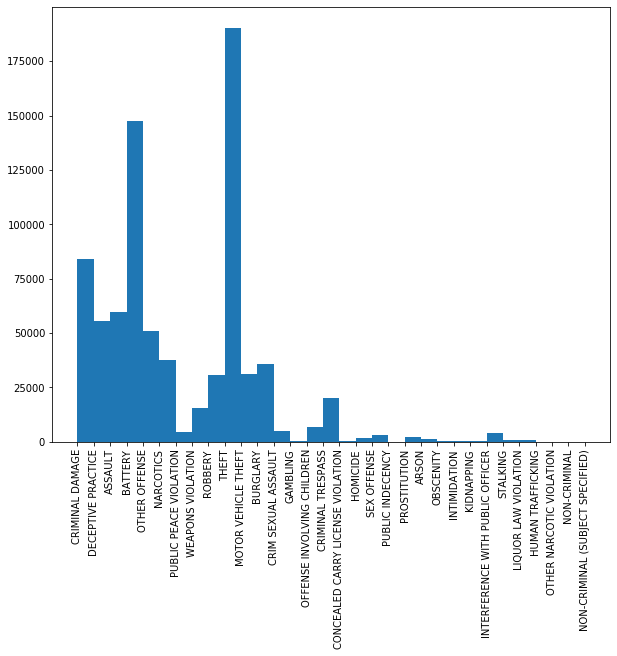

In [4]:
primaryTypeList = crime['Primary Type']

plt.figure(figsize=[10,8])
plt.hist(primaryTypeList,bins=31)
plt.xticks(rotation=90)
plt.show()

### Part 2

In [5]:
from collections import Counter
values = crime['Primary Type']
counts = Counter(values)
typelist=[]
countlist=[]
for k, count in counts.most_common():
    typelist.append(k)
    countlist.append(count)

In [6]:
orderlist = []
for i in range(len(typelist)):
    for x in range(countlist[i]):
        orderlist.append(typelist[i])

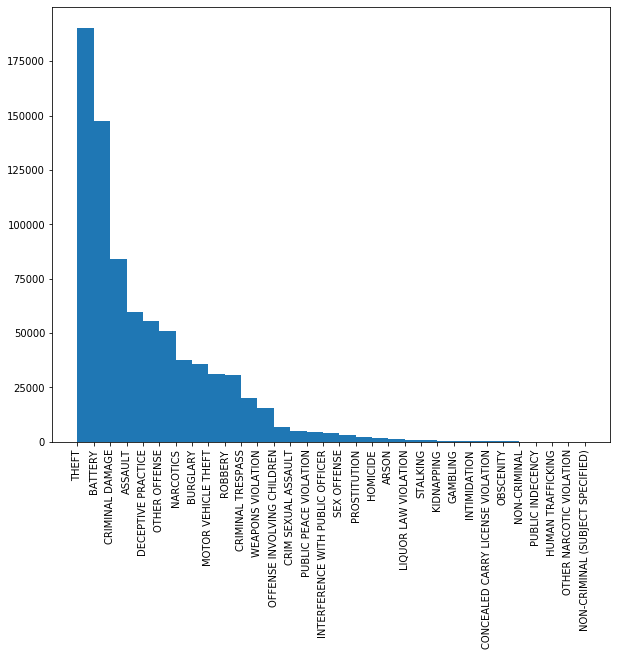

In [7]:
plt.figure(figsize=[10,8])
plt.hist(orderlist,bins=31)
plt.xticks(rotation=90)
plt.show()

### Part 3

In [14]:
def randomForest(k):
    
    # convert features
    data2 = crime['Block']
    data2 = data2.str.slice(stop=3)
    data3 = crime['Date']
    data3 = data3.str.slice(stop=2)
    
    data = crime.copy()
    class_mapping = {label:idx+1 for idx,label in 
                 enumerate(typelist[:k])}
    data['Primary Type'] = data['Primary Type'].map(class_mapping)

    data['Arrest'] = np.where(data['Arrest']==True, 1, 0)
    data['Domestic']= np.where(data['Domestic']==True, 1, 0)
    data['Block'] = data2
    data['Date'] = data3

    data = data[data['Primary Type'].isin(range(k+1))][['Primary Type','Date','Block','Domestic','Arrest','Beat','District','Ward','Community Area',
                                                        'X Coordinate','Y Coordinate','Historical Wards 2003-2015',
                                                        'Zip Codes','Community Areas','Census Tracts','Wards','Boundaries - ZIP Codes',
                                                        'Police Districts','Police Beats']].dropna()

    X = data.iloc[:,1:]
    y = data.iloc[:,0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # run the model
    RF = RandomForestClassifier(n_jobs=15,n_estimators=50,random_state=0)
    
    RF.fit(X_train,y_train)
    y_pred = RF.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    # get how good model is
    print("RF accuracy {} ".format(accuracy))
    print("The F1 score is " + str(f1_score(y_test, y_pred, average='weighted')))
    print("The recall score is " + str(recall_score(y_test, y_pred, average='weighted')))
    print("The precision score is " + str(precision_score(y_test, y_pred, average='weighted')) + '\n')

In [15]:
t0 = time.time()
timeRandForest = 0

k = [2,3,4,5]
for i in k:
    print("When K = "+str(i)+":")
    randomForest(i)

t1 = time.time()
timeRandForest = t1-t0

print("Time to run = "+str(timeRandForest) +" seconds")

When K = 2:
RF accuracy 0.7703458303976974 
The F1 score is 0.7692912597518649
The recall score is 0.7703458303976974
The precision score is 0.7696800227356689

When K = 3:
RF accuracy 0.6061558014891908 
The F1 score is 0.5984825185803601
The recall score is 0.6061558014891908
The precision score is 0.5939523078978276

When K = 4:
RF accuracy 0.5130445742133345 
The F1 score is 0.5000423347557
The recall score is 0.5130445742133345
The precision score is 0.4911838419339206

When K = 5:
RF accuracy 0.456948690524642 
The F1 score is 0.4441991716807689
The recall score is 0.456948690524642
The precision score is 0.4359364589455209

Time to run = 72.09143257141113 seconds


In [9]:
def filterData():
    data2 = crime['Block']
    data2 = data2.str.slice(stop=3)
    data3 = crime['Date']
    data3 = data3.str.slice(stop=2)
    
    data = crime.copy()
    class_mapping = {label:idx+1 for idx,label in 
                 enumerate(typelist[:4])}
    data['Primary Type'] = data['Primary Type'].map(class_mapping)

    data['Arrest'] = np.where(data['Arrest']==True, 1, 0)
    data['Domestic']= np.where(data['Domestic']==True, 1, 0)
    data['Block'] = data2
    data['Date'] = data3

    data = data[data['Primary Type'].isin(range(4+1))][['Primary Type','Date','Block','Domestic','Arrest','Beat','District','Ward','Community Area',
                                                        'X Coordinate','Y Coordinate','Historical Wards 2003-2015',
                                                        'Zip Codes','Community Areas','Census Tracts','Wards','Boundaries - ZIP Codes',
                                                        'Police Districts','Police Beats']].dropna()

    X = data.iloc[:,1:]
    y = data.iloc[:,0]
    print(data.shape)

In [16]:
filterData()

(476058, 19)


In [11]:
crime.shape

(791139, 30)

## P value when K equals to 4

In [18]:
476058/791139

0.6017374949281985

### For k = 4, 60.17% of the original dataset's samples are being used in the new filtered data set.

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [19]:
def convertFeatures():
    data2 = crime['Block']
    data2 = data2.str.slice(stop=3)
    data3 = crime['Date']
    data3 = data3.str.slice(stop=2)
    
    data = crime.copy()
    class_mapping = {label:idx+1 for idx,label in 
                 enumerate(typelist[:4])}
    data['Primary Type'] = data['Primary Type'].map(class_mapping)

    data['Arrest'] = np.where(data['Arrest']==True, 1, 0)
    data['Domestic']= np.where(data['Domestic']==True, 1, 0)
    data['Block'] = data2
    data['Date'] = data3

    data = data[data['Primary Type'].isin(range(4+1))][['Primary Type','Date','Block','Domestic','Arrest','Beat','District','Ward','Community Area',
                                                        'X Coordinate','Y Coordinate','Historical Wards 2003-2015',
                                                        'Zip Codes','Community Areas','Census Tracts','Wards','Boundaries - ZIP Codes',
                                                        'Police Districts','Police Beats']].dropna()

    X = data.iloc[:,1:]
    y = data.iloc[:,0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [20]:
t0 = time.time()
timeRandForest = 0

randomForest(4) 

t1 = time.time()
timeRandForest = t1-t0

RF accuracy 0.5081607360416754 
The F1 score is 0.4944658440553366
The recall score is 0.5081607360416754
The precision score is 0.48534608308248584



In [21]:
print("Time taken to run Random Forest model: %f seconds" % timeRandForest)

Time taken to run Random Forest model: 6.434790 seconds


As k increases, the accuracy scores of the model decrease for the same model. We can see the accuracy decrease from approximately 78% to 51% as we increase the number of k classes from 2 to 4.

# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

In [16]:
# read data
t0 = time.process_time()
timeData = 0

data2 = crime['Block']
data2 = data2.str.slice(stop=3)
data3 = crime['Date']
data3 = data3.str.slice(stop=2)

data = crime.copy()
class_mapping = {label:idx+1 for idx,label in 
             enumerate(typelist[:4])}
data['Primary Type'] = data['Primary Type'].map(class_mapping)

data['Arrest'] = np.where(data['Arrest']==True, 1, 0)
data['Domestic']= np.where(data['Domestic']==True, 1, 0)
data['Block'] = data2
data['Date'] = data3

data = data[data['Primary Type'].isin(range(4+1))][['Primary Type','Date','Block','Domestic','Arrest','Beat','District','Ward','Community Area',
                                                    'X Coordinate','Y Coordinate','Historical Wards 2003-2015',
                                                    'Zip Codes','Community Areas','Census Tracts','Wards','Boundaries - ZIP Codes',
                                                    'Police Districts','Police Beats']].dropna()
X = data.iloc[:,1:]
y = data.iloc[:,0]

t1 = time.process_time()
timeData = t1-t0

# train and test data
t00 = time.process_time()
timeTrainTest = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t11 = time.process_time()
timeTrainTest = t11-t00

In [17]:
print("Laptop:")
print("Time taken to read data: %f seconds" % timeData)
print("Time taken to train and test data: %f seconds" % timeTrainTest)
print("Time taken to run Random Forest model: %f seconds" % timeRandForest +'\n')

print("AWS:")
print("Time taken to read data: 5.395434 seconds")
print("Time taken to train and test data: 0.298416 seconds")
print("Time taken to run Random Forest model: 26.287845 seconds")

Laptop:
Time taken to read data: 5.000000 seconds
Time taken to train and test data: 0.343750 seconds
Time taken to run Random Forest model: 8.439312 seconds

AWS:
Time taken to read data: 5.395434 seconds
Time taken to train and test data: 0.298416 seconds
Time taken to run Random Forest model: 26.287845 seconds


# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

In [21]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [22]:
def runKClasses(k):
    data2 = crime['Block']
    data2 = data2.str.slice(stop=3)
    data3 = crime['Date']
    data3 = data3.str.slice(stop=2)

    data = crime.copy()
    class_mapping = {label:idx+1 for idx,label in 
                 enumerate(typelist[:4])}
    data['Primary Type'] = data['Primary Type'].map(class_mapping)

    data['Arrest'] = np.where(data['Arrest']==True, 1, 0)
    data['Domestic']= np.where(data['Domestic']==True, 1, 0)
    data['Block'] = data2
    data['Date'] = data3

    data = data[data['Primary Type'].isin(range(k+1))][['Primary Type','Date','Block','Domestic','Arrest','Beat','District','Ward','Community Area',
                                                        'X Coordinate','Y Coordinate','Historical Wards 2003-2015',
                                                        'Zip Codes','Community Areas','Census Tracts','Wards','Boundaries - ZIP Codes',
                                                        'Police Districts','Police Beats']].dropna()
    X = data.iloc[:,1:]
    y = data.iloc[:,0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    
    RF = RandomForestClassifier(n_jobs=15,random_state=0)
    RF.fit(X_train,y_train)
#     y_pred = RF.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
    
#     kf = KFold(n_splits=5)
#     for train, test in kf.split(X):
#             X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
#             score = RF.fit(X_train, y_train).score(X_test, y_test)
#             print(score)
    
    scores = cross_val_score(RF, X_test, y_test, cv=5)
    print(scores)

    print('\nCV accuracy: %.3f' % (np.mean(scores)))
    print()

In [23]:
t0 = time.time()
timeTakenKFold = 0
runKClasses(4)
t1 = time.time()
timeTakenKFold = t1-t0

[0.49627179 0.48721315 0.49283201 0.4897852  0.49157082]

CV accuracy: 0.492



In [46]:
print("Time taken to run K-fold cross validation on laptop: %f seconds" % timeTakenKFold)

print("Time taken to run K-fold cross validation on AWS: 30.653972 seconds")

Time taken to run K-fold cross validation on laptop: 20.359724 seconds
Time taken to run K-fold cross validation on AWS: 30.653972 seconds
